In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy.stats import norm
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.metrics import confusion_matrix

#### Run Below Code for every file like TV,Radio,NewsPaper,Twitter and FB

In [78]:
df = pd.read_excel('ABT_newspaper.xlsx')

In [79]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [80]:
#Train Test Spli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.10, random_state=15)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_final = sc_X.fit_transform(X)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)

## Logistic Regression

In [81]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('-'*50)
print('Confusion Matrix:')
print(cm)
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)


--------------------------------------------------
Confusion Matrix:
[[178 194]
 [189 189]]
--------------------------------------------------
             precision    recall  f1-score   support

          0       0.49      0.48      0.48       372
          1       0.49      0.50      0.50       378

avg / total       0.49      0.49      0.49       750

--------------------------------------------------


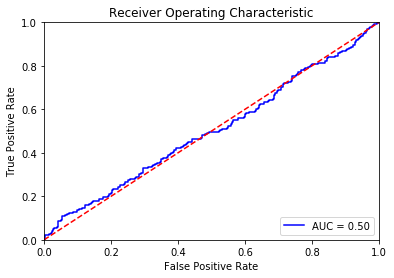

In [82]:
import sklearn.metrics as metrics
%matplotlib inline
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_LR = metrics.auc(fpr, tpr)

# # method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM

In [83]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier_SVM.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_SVM.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('-'*50)
print('Confusion Matrix:')
print(cm)
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)

--------------------------------------------------
Confusion Matrix:
[[175 197]
 [186 192]]
--------------------------------------------------
             precision    recall  f1-score   support

          0       0.48      0.47      0.48       372
          1       0.49      0.51      0.50       378

avg / total       0.49      0.49      0.49       750

--------------------------------------------------


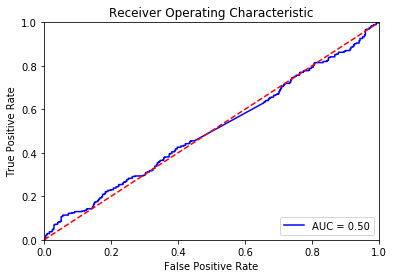

In [84]:
import sklearn.metrics as metrics
%matplotlib inline
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_SVM.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_SVM = metrics.auc(fpr, tpr)

# # method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forrest 

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('-'*50)
print('Confusion Matrix:')
print(cm)
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)

--------------------------------------------------
Confusion Matrix:
[[216 156]
 [230 148]]
--------------------------------------------------
             precision    recall  f1-score   support

          0       0.48      0.58      0.53       372
          1       0.49      0.39      0.43       378

avg / total       0.49      0.49      0.48       750

--------------------------------------------------


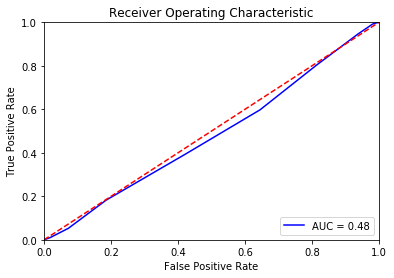

In [86]:
import sklearn.metrics as metrics
%matplotlib inline
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_RF.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_RF = metrics.auc(fpr, tpr)

# # method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XG Boost

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_XGB.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('-'*50)
print('Confusion Matrix:')
print(cm)
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)

--------------------------------------------------
Confusion Matrix:
[[231 286]
 [215 268]]
--------------------------------------------------
             precision    recall  f1-score   support

          0       0.52      0.45      0.48       517
          1       0.48      0.55      0.52       483

avg / total       0.50      0.50      0.50      1000

--------------------------------------------------


/Users/sk186089/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


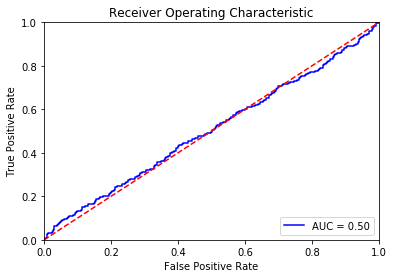

In [88]:
import sklearn.metrics as metrics
%matplotlib inline
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_XGB.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_XGB = metrics.auc(fpr, tpr)

# # method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_XGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using Cross Validation, Grid Search and Parameter Tunning 

In [89]:
def prediction_report(y_pred):
    
    print(accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_pred,y_test))


fold = 5
paramCombinations = 10
skf = StratifiedKFold(random_state=42,shuffle=True,n_splits=fold)
param_RF = {
    'n_estimators' : [10,50,100,150,200],
    'max_depth' : [3, 4, 5, 8, 10, 12]
}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_RF,
                                 #verbose= 3,
                                 scoring= 'roc_auc',
                                 random_state=42,
                                 n_iter=paramCombinations, 
                                 cv = skf.split(X_cv,y_cv))

rand_search.fit(X_train, y_train)

y_pred = rand_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('-'*50)
print('Confusion Matrix: Optimized Solution')
print(cm)
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)

--------------------------------------------------
Confusion Matrix: Optimized Solution
[[154 363]
 [154 329]]
--------------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.30      0.37       517
          1       0.48      0.68      0.56       483

avg / total       0.49      0.48      0.46      1000

--------------------------------------------------


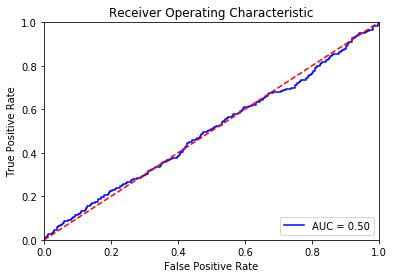

In [90]:
import sklearn.metrics as metrics
%matplotlib inline
# calculate the fpr and tpr for all thresholds of the classification
probs = rand_search.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_RS = metrics.auc(fpr, tpr)

# # method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_RS)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Comparing and Selecting Models

In [91]:
AUC_DICT = {'LR':roc_auc_RF, 
            'RF':roc_auc_RF, 
            'SVM':roc_auc_SVM,
            'XGB':roc_auc_XGB,
            'RS':roc_auc_RS}

classifier_DICT = {'LR':classifier_LR,
                   'SVM':classifier_SVM,
                   'RF':classifier_RF,
                   'XGB':classifier_XGB,
                   'RS':rand_search}
print(AUC_DICT)
import operator
max_auc = max(AUC_DICT.items(), key=operator.itemgetter(1))[0]
print(max_auc)
probs_f = classifier_DICT[max_auc].predict_proba(X_final)
preds_f = probs_f[:,1]
prob = pd.DataFrame(preds_f)
df['Probablity'] = prob
df.head()

{'LR': 0.48139969846959085, 'RF': 0.48139969846959085, 'SVM': 0.5022543665016783, 'XGB': 0.5028973493358322, 'RS': 0.49904489589965995}
XGB


,cust_no,cust_seg,tenure,gender,age,total_rev_Amt,prob_exp_mon1,prob_exp_mon2,prob_exp_mon3,prob_exp_mon4,prob_exp_mon5,prob_exp_mon6,prob_exp_mon7,prob_exp_mon8,prob_exp_mon9,prob_exp_mon10,prob_exp_mon11,prob_exp_mon12,app_flg,Probablity
0,8791958,1,40,0,50,4509139,0.430,0.577,0.247,0.520,0.042,0.405,0.047,0.666,0.932,0.093,0.908,0.962,1,0.549161
1,8770539,1,56,1,84,2689303,0.379,0.745,0.233,0.657,0.866,0.639,0.562,0.258,0.121,0.094,0.469,0.787,0,0.835587
2,1040153,4,37,1,50,71641,0.728,0.725,0.319,0.981,0.269,0.037,0.460,0.465,0.724,0.331,0.361,0.924,0,0.456338
3,2561218,2,10,0,83,4853254,0.738,0.245,0.318,0.993,0.368,0.644,0.952,0.864,0.778,0.943,0.019,0.658,0,0.182451
4,4973530,3,58,1,35,4521508,0.534,0.616,0.647,0.745,0.516,0.786,0.714,0.257,0.857,0.006,0.832,0.596,0,0.404575


#### Change the Val to TV,R,Tw,NP and FB while running for respective files

In [92]:
def f(row):
    if row['Probablity'] > cutoff:
        val = 'NP'
    else:
        val = 0
    return val

#### Change channel value to respesctive File like TV,Radio,Newspaper, FB etc..

In [93]:
df_lift = df.iloc[:,[0,-2,-1]][df['app_flg'] == 1]
df_lift = df_lift.sort_values(by='Probablity',ascending=False)
df_lift['row_id'] = range(0,0+len(df_lift))
df_lift['decile'] = (df_lift['row_id']/(len(df_lift)/10)).astype(int)
cutoff = df_lift.iloc[:,2][df_lift['decile'] == 2].mean()
print(cutoff)
df_final = df.iloc[:,[0,-1]][df['app_flg'] == 1]
df_final['conversion'] = df_final.apply(f, axis=1)
df_final['channel'] = 'Newspaper'
df_final['cutoff'] = cutoff

0.5953798890113831


In [94]:
df_markov = df_markov.append(df_final)

In [101]:
df_markov.to_excel('markov.xlsx')
df_markov = pd.read_excel('markov.xlsx',usecols = [i for i in range(1,6)])
cl = list(df_markov['cust_no'])

In [277]:
def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element) + '>'
    return result

In [287]:
df_markov1 = pd.DataFrame()
for i in cl:
    #print(i)
    temp = df_markov.loc[(df_markov['cust_no'] == i) & (df_markov['conversion'] != 0),["cust_no",'conversion']] 
    temp = temp.pivot(index='cust_no', columns='conversion',values='conversion')
    print(temp.head())
    key = temp.index.values
    try:
        key = key[0]
    except:
        print('empty_dataframe')
    values = list(temp.columns.values)
    values = concatenate_list_data(values)
    try:
        d.update({key:values})
    except:
        print('empty dataframe')

8791958
conversion  FB
cust_no       
8791958     FB
4335532
conversion  NP  R  Tw
cust_no              
4335532     NP  R  Tw
7654392
conversion  FB  Tw
cust_no           
7654392     FB  Tw
7037607
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3689451
conversion  NP  Tw
cust_no           
3689451     NP  Tw
2044597
conversion  FB
cust_no       
2044597     FB
4195778
conversion  NP  R
cust_no          
4195778     NP  R
896003
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7596185
conversion  FB  NP  Tw
cust_no               
7596185     FB  NP  Tw
4039377
conversion  NP  R  Tw
cust_no              
4039377     NP  R  Tw
875638
conversion  NP
cust_no       
875638      NP
1323404
conversion  FB  R  TV
cust_no              
1323404     FB  R  TV
4948433
conversion  FB  Tw
cust_no           
4948433     FB  Tw
6931534
conversion  FB  NP
cust_no           
6931534     FB  NP
7743192
conversion  FB  Tw
cust_no           
7743192     FB  Tw
6

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3005822
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4253660
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1065763
conversion  Tw
cust_no       
1065763     Tw
1874505
conversion  R
cust_no      
1874505     R
7253860
conversion  FB  NP  R  TV  Tw
cust_no                      
7253860     FB  NP  R  TV  Tw
3551691
conversion  FB  NP  TV  Tw
cust_no                   
3551691     FB  NP  TV  Tw
5542620
conversion  NP  R
cust_no          
5542620     NP  R
3749990
conversion  R  TV  Tw
cust_no              
3749990     R  TV  Tw
1022374
conversion  NP
cust_no       
1022374     NP
8584621
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4445128
conversion  NP  Tw
cust_no           
4445128     NP  Tw
6069550
conversion  R
cust_no      
6069550     R
2038852
conversion  FB  R
cust_no          
2038852     FB  R
5008446
Empty DataFrame
Columns: []
Inde

1219655     NP
8792551
conversion  NP  R  TV
cust_no              
8792551     NP  R  TV
3768364
conversion  R  TV
cust_no          
3768364     R  TV
3295252
conversion  R
cust_no      
3295252     R
8182673
conversion  NP  Tw
cust_no           
8182673     NP  Tw
3388356
conversion  NP
cust_no       
3388356     NP
6665626
conversion  FB  NP
cust_no           
6665626     FB  NP
8496560
conversion  TV  Tw
cust_no           
8496560     TV  Tw
8739544
conversion  Tw
cust_no       
8739544     Tw
5934550
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5051864
conversion  FB
cust_no       
5051864     FB
7995964
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4682418
conversion  FB
cust_no       
4682418     FB
1156664
conversion  R  TV  Tw
cust_no              
1156664     R  TV  Tw
3829957
conversion  R  TV
cust_no          
3829957     R  TV
6211131
conversion  FB
cust_no       
6211131     FB
2129371
conversion  FB
cust_no       
2129371  

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5744005
conversion  R
cust_no      
5744005     R
6510052
conversion  FB
cust_no       
6510052     FB
2216775
conversion  FB  R  TV  Tw
cust_no                  
2216775     FB  R  TV  Tw
4231688
conversion  NP
cust_no       
4231688     NP
1484758
conversion  NP
cust_no       
1484758     NP
8509439
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8376498
conversion  R  TV
cust_no          
8376498     R  TV
5901271
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8671107
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6067113
conversion  NP  R
cust_no          
6067113     NP  R
1503229
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1125434
conversion  Tw
cust_no       
1125434     Tw
6781159
conversion  R  Tw
cust_no          
6781159     R  Tw
3834371
conversion  R  TV
cust_no          
3834371     R  TV
5353591
conversion  NP

Index: []
empty_dataframe
empty dataframe
2799709
conversion  FB  NP  R
cust_no              
2799709     FB  NP  R
1873382
conversion  NP  R  TV  Tw
cust_no                  
1873382     NP  R  TV  Tw
4497389
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4073502
conversion  NP  Tw
cust_no           
4073502     NP  Tw
5357350
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7317938
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4416234
conversion  FB  R
cust_no          
4416234     FB  R
4186071
conversion  FB  R
cust_no          
4186071     FB  R
7649737
conversion  FB  NP
cust_no           
7649737     FB  NP
5276987
conversion  R  Tw
cust_no          
5276987     R  Tw
2693400
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3726162
conversion  NP
cust_no       
3726162     NP
5796887
conversion  NP
cust_no       
5796887     NP
5449432
conversion  FB  TV  Tw
cust_no               
5449432   

Index: []
empty_dataframe
empty dataframe
7297446
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2326945
conversion  FB  R  TV
cust_no              
2326945     FB  R  TV
7390830
conversion  NP  Tw
cust_no           
7390830     NP  Tw
4437699
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5084456
conversion  R  TV
cust_no          
5084456     R  TV
4577924
conversion  NP
cust_no       
4577924     NP
6471053
conversion  Tw
cust_no       
6471053     Tw
1259108
conversion  FB  TV  Tw
cust_no               
1259108     FB  TV  Tw
8472279
conversion  R  TV
cust_no          
8472279     R  TV
8959567
conversion  FB  NP  R  TV
cust_no                  
8959567     FB  NP  R  TV
5889956
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1821999
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3474696
conversion  FB  R
cust_no          
3474696     FB  R
3623102
Empty DataFrame
Columns: []
Index: []
empty_

Index: []
empty_dataframe
empty dataframe
6729140
conversion  FB  NP
cust_no           
6729140     FB  NP
7394446
conversion  R
cust_no      
7394446     R
3992259
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3824665
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1363142
conversion  TV
cust_no       
1363142     TV
8993035
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5489364
conversion  FB  R
cust_no          
5489364     FB  R
4571148
conversion  R  TV  Tw
cust_no              
4571148     R  TV  Tw
4712138
conversion  FB
cust_no       
4712138     FB
2055363
conversion  FB  NP  TV
cust_no               
2055363     FB  NP  TV
3767516
conversion  Tw
cust_no       
3767516     Tw
2593801
conversion  FB
cust_no       
2593801     FB
6370854
conversion  Tw
cust_no       
6370854     Tw
2457981
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7073154
Empty DataFrame
Columns: []
Index: []
empty_d

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7843341
conversion  R
cust_no      
7843341     R
2624382
conversion  NP  Tw
cust_no           
2624382     NP  Tw
3614066
conversion  R  TV
cust_no          
3614066     R  TV
4721013
conversion  FB  NP
cust_no           
4721013     FB  NP
1872326
conversion  R
cust_no      
1872326     R
2692627
conversion  FB
cust_no       
2692627     FB
5997022
conversion  NP
cust_no       
5997022     NP
5564528
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8139108
conversion  R
cust_no      
8139108     R
7473012
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2643510
conversion  R  TV
cust_no          
2643510     R  TV
2798046
conversion  TV  Tw
cust_no           
2798046     TV  Tw
2359863
conversion  NP
cust_no       
2359863     NP
2206880
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7826834
conversion  R  TV
cust_no          
7826834     R  TV
769679

conversion  TV
cust_no       
4364789     TV
3940007
conversion  FB  TV  Tw
cust_no               
3940007     FB  TV  Tw
7738961
conversion  NP  R
cust_no          
7738961     NP  R
5839816
conversion  NP  Tw
cust_no           
5839816     NP  Tw
8163786
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4701432
conversion  NP
cust_no       
4701432     NP
7615201
conversion  FB  TV
cust_no           
7615201     FB  TV
2732596
conversion  TV  Tw
cust_no           
2732596     TV  Tw
4849800
conversion  NP
cust_no       
4849800     NP
6284120
conversion  R  TV  Tw
cust_no              
6284120     R  TV  Tw
6617265
conversion  Tw
cust_no       
6617265     Tw
2205242
conversion  TV
cust_no       
2205242     TV
884021
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3101482
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3902349
conversion  R  TV
cust_no          
3902349     R  TV
1588403
Empty DataFrame
Columns: []
Inde

7950551     TV
2928281
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4202443
conversion  R
cust_no      
4202443     R
6630939
conversion  TV
cust_no       
6630939     TV
6699877
conversion  NP  R
cust_no          
6699877     NP  R
7170755
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
809841
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4520780
conversion  NP
cust_no       
4520780     NP
5027941
conversion  FB
cust_no       
5027941     FB
1818239
conversion  TV
cust_no       
1818239     TV
8654527
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5626819
conversion  FB  NP  R
cust_no              
5626819     FB  NP  R
5626003
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2889833
conversion  TV  Tw
cust_no           
2889833     TV  Tw
4925115
conversion  FB
cust_no       
4925115     FB
2325235
conversion  R  TV
cust_no          
2325235     R  TV
3418866
conversion

conversion  NP
cust_no       
5832821     NP
2109599
conversion  TV
cust_no       
2109599     TV
1947132
conversion  TV
cust_no       
1947132     TV
7627807
conversion  NP
cust_no       
7627807     NP
5810041
conversion  NP
cust_no       
5810041     NP
1459362
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4913549
conversion  NP
cust_no       
4913549     NP
3705284
conversion  Tw
cust_no       
3705284     Tw
1809210
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5863368
conversion  NP  R  TV  Tw
cust_no                  
5863368     NP  R  TV  Tw
1517664
conversion  R  TV
cust_no          
1517664     R  TV
2878105
conversion  TV
cust_no       
2878105     TV
2048088
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2683341
conversion  R  TV
cust_no          
2683341     R  TV
2307875
conversion  FB
cust_no       
2307875     FB
3246041
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7041576
c

conversion  FB
cust_no       
7054246     FB
7818533
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8271694
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5087042
conversion  Tw
cust_no       
5087042     Tw
8845725
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2136213
conversion  Tw
cust_no       
2136213     Tw
6363118
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5246174
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8429704
conversion  NP
cust_no       
8429704     NP
8541364
conversion  FB
cust_no       
8541364     FB
8804609
conversion  FB  NP
cust_no           
8804609     FB  NP
7616274
conversion  FB
cust_no       
7616274     FB
6502170
conversion  NP
cust_no       
6502170     NP
5876250
conversion  NP  R  TV
cust_no              
5876250     NP  R  TV
1031496
conversion  FB  R
cust_no          
1031496     FB  R
5113417
conversion  R  Tw
cust_no          
51

Index: []
empty_dataframe
empty dataframe
4252323
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7860212
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8334203
conversion  FB  TV
cust_no           
8334203     FB  TV
4861666
conversion  FB  NP  Tw
cust_no               
4861666     FB  NP  Tw
3458673
conversion  FB  Tw
cust_no           
3458673     FB  Tw
8064302
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2352920
conversion  R  Tw
cust_no          
2352920     R  Tw
1556270
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1710788
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8632898
conversion  R  TV
cust_no          
8632898     R  TV
8423332
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2291981
conversion  R
cust_no      
2291981     R
5482639
conversion  FB  TV
cust_no           
5482639     FB  TV
8505595
Empty DataFrame
Columns: []
Index: [

conversion  FB  NP  R
cust_no              
4245913     FB  NP  R
5820061
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6868302
conversion  FB
cust_no       
6868302     FB
2557019
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8885516
conversion  R  TV
cust_no          
8885516     R  TV
8425925
conversion  R
cust_no      
8425925     R
6316040
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4904521
conversion  Tw
cust_no       
4904521     Tw
1679688
conversion  NP  TV  Tw
cust_no               
1679688     NP  TV  Tw
8880576
conversion  R
cust_no      
8880576     R
3040178
conversion  Tw
cust_no       
3040178     Tw
8506751
conversion  NP
cust_no       
8506751     NP
3606448
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4235787
conversion  TV
cust_no       
4235787     TV
5301277
conversion  R  Tw
cust_no          
5301277     R  Tw
4643739
conversion  Tw
cust_no       
4643739     Tw
232

6013364     TV
6443070
conversion  NP  TV
cust_no           
6443070     NP  TV
8192652
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6102011
conversion  NP
cust_no       
6102011     NP
8981991
conversion  TV
cust_no       
8981991     TV
8503109
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4043578
conversion  FB  NP
cust_no           
4043578     FB  NP
2110630
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4034579
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8557478
conversion  FB
cust_no       
8557478     FB
8561265
conversion  NP
cust_no       
8561265     NP
3543335
conversion  FB
cust_no       
3543335     FB
5071854
conversion  FB  TV
cust_no           
5071854     FB  TV
6984777
conversion  NP
cust_no       
6984777     NP
849540
conversion  FB  NP
cust_no           
849540      FB  NP
937852
conversion  NP
cust_no       
937852      NP
7652915
conversion  NP  R  TV
cust_no       

Index: []
empty_dataframe
empty dataframe
5611169
conversion  TV  Tw
cust_no           
5611169     TV  Tw
6158409
conversion  Tw
cust_no       
6158409     Tw
8260080
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5209318
conversion  R  Tw
cust_no          
5209318     R  Tw
3831881
conversion  FB  TV
cust_no           
3831881     FB  TV
2395956
conversion  R
cust_no      
2395956     R
1971188
conversion  FB
cust_no       
1971188     FB
2627097
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3485167
conversion  R  TV
cust_no          
3485167     R  TV
8465242
conversion  R
cust_no      
8465242     R
8759227
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2682763
conversion  FB  NP  Tw
cust_no               
2682763     FB  NP  Tw
3150914
conversion  NP
cust_no       
3150914     NP
5888909
conversion  R  Tw
cust_no          
5888909     R  Tw
7845725
conversion  FB
cust_no       
7845725     FB
5697983
conversion 

conversion  FB  R  TV  Tw
cust_no                  
4935885     FB  R  TV  Tw
6008567
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
850728
conversion  R  TV
cust_no          
850728      R  TV
2216073
conversion  FB
cust_no       
2216073     FB
7526860
conversion  TV
cust_no       
7526860     TV
4235385
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8841237
conversion  FB  R
cust_no          
8841237     FB  R
8507380
conversion  NP
cust_no       
8507380     NP
6748061
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5171379
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5826917
conversion  R  TV  Tw
cust_no              
5826917     R  TV  Tw
3073002
conversion  FB  R  TV
cust_no              
3073002     FB  R  TV
7895720
conversion  NP  R
cust_no          
7895720     NP  R
6866770
conversion  R  TV  Tw
cust_no              
6866770     R  TV  Tw
1010750
conversion  NP  Tw
cust_no          

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5885637
conversion  FB  NP  TV  Tw
cust_no                   
5885637     FB  NP  TV  Tw
2229437
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7652299
conversion  FB  TV
cust_no           
7652299     FB  TV
7238967
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7918885
conversion  NP
cust_no       
7918885     NP
8488718
conversion  NP
cust_no       
8488718     NP
969289
conversion  Tw
cust_no       
969289      Tw
5533172
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3043389
conversion  NP  TV  Tw
cust_no               
3043389     NP  TV  Tw
3012473
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2657757
conversion  R  TV  Tw
cust_no              
2657757     R  TV  Tw
8401556
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3143886
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe

3712886     Tw
4172926
conversion  TV
cust_no       
4172926     TV
5777319
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4869869
conversion  R  TV  Tw
cust_no              
4869869     R  TV  Tw
1166182
conversion  FB
cust_no       
1166182     FB
5444841
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2460171
conversion  FB  R  TV  Tw
cust_no                  
2460171     FB  R  TV  Tw
8753123
conversion  R
cust_no      
8753123     R
7313634
conversion  FB  Tw
cust_no           
7313634     FB  Tw
4127037
conversion  Tw
cust_no       
4127037     Tw
710678
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4696009
conversion  Tw
cust_no       
4696009     Tw
6609600
conversion  TV  Tw
cust_no           
6609600     TV  Tw
4373634
conversion  NP
cust_no       
4373634     NP
6656280
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3310823
conversion  TV
cust_no       
3310823     TV
1718778
conversi

conversion  FB
cust_no       
6528495     FB
7167294
conversion  R  TV
cust_no          
7167294     R  TV
4829940
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5414695
conversion  NP  Tw
cust_no           
5414695     NP  Tw
5752930
conversion  Tw
cust_no       
5752930     Tw
2293428
conversion  NP
cust_no       
2293428     NP
3518053
conversion  NP  R  TV
cust_no              
3518053     NP  R  TV
791568
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8800416
conversion  R  TV  Tw
cust_no              
8800416     R  TV  Tw
1082657
conversion  FB  Tw
cust_no           
1082657     FB  Tw
2783627
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6542361
conversion  NP  TV  Tw
cust_no               
6542361     NP  TV  Tw
2045693
conversion  FB  R
cust_no          
2045693     FB  R
5820017
conversion  TV
cust_no       
5820017     TV
2010388
conversion  Tw
cust_no       
2010388     Tw
3222009
conversion  TV
cust_no 

2229935     Tw
2115668
conversion  NP
cust_no       
2115668     NP
7118755
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3777862
conversion  Tw
cust_no       
3777862     Tw
5937107
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1558243
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5935248
conversion  TV
cust_no       
5935248     TV
8724721
conversion  FB
cust_no       
8724721     FB
8915196
conversion  FB  NP  Tw
cust_no               
8915196     FB  NP  Tw
2756923
conversion  FB  NP
cust_no           
2756923     FB  NP
3742046
conversion  FB  TV
cust_no           
3742046     FB  TV
4208012
conversion  Tw
cust_no       
4208012     Tw
1882073
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1245171
conversion  R
cust_no      
1245171     R
1026856
conversion  NP  Tw
cust_no           
1026856     NP  Tw
2890426
conversion  TV
cust_no       
2890426     TV
2318449
conversion  Tw
cust_no   

conversion  NP
cust_no       
1050053     NP
7896088
conversion  R  TV
cust_no          
7896088     R  TV
757011
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
765793
conversion  FB  NP
cust_no           
765793      FB  NP
2777838
conversion  NP
cust_no       
2777838     NP
7104010
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5796205
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7701847
conversion  Tw
cust_no       
7701847     Tw
6357722
conversion  NP  R  TV
cust_no              
6357722     NP  R  TV
813979
conversion  FB  R  TV  Tw
cust_no                  
813979      FB  R  TV  Tw
5973943
conversion  FB  TV
cust_no           
5973943     FB  TV
8707463
conversion  FB  Tw
cust_no           
8707463     FB  Tw
5031466
conversion  NP
cust_no       
5031466     NP
2548547
conversion  Tw
cust_no       
2548547     Tw
8476219
conversion  NP
cust_no       
8476219     NP
2461724
conversion  FB
cust_no       
2461

7578327     FB  TV  Tw
2528858
conversion  FB  R
cust_no          
2528858     FB  R
3545706
conversion  FB  Tw
cust_no           
3545706     FB  Tw
4119664
conversion  FB
cust_no       
4119664     FB
4224506
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3848459
conversion  NP
cust_no       
3848459     NP
3447650
conversion  FB  Tw
cust_no           
3447650     FB  Tw
8424556
conversion  FB  Tw
cust_no           
8424556     FB  Tw
6969165
conversion  TV
cust_no       
6969165     TV
4438537
conversion  NP  TV
cust_no           
4438537     NP  TV
6195567
conversion  NP  Tw
cust_no           
6195567     NP  Tw
1155060
conversion  TV
cust_no       
1155060     TV
2214423
conversion  NP  R
cust_no          
2214423     NP  R
1618265
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4348163
conversion  R
cust_no      
4348163     R
7130630
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5962269
conversion  NP
cust_no  

conversion  NP
cust_no       
3417390     NP
2373688
conversion  FB
cust_no       
2373688     FB
2886746
conversion  NP
cust_no       
2886746     NP
8567191
conversion  R
cust_no      
8567191     R
2680915
conversion  R  TV
cust_no          
2680915     R  TV
5765174
conversion  FB  NP
cust_no           
5765174     FB  NP
1079902
conversion  NP  Tw
cust_no           
1079902     NP  Tw
5025590
conversion  Tw
cust_no       
5025590     Tw
2218702
conversion  R  TV
cust_no          
2218702     R  TV
4032937
conversion  R  TV
cust_no          
4032937     R  TV
6616090
conversion  FB  R
cust_no          
6616090     FB  R
3329624
conversion  FB  NP  Tw
cust_no               
3329624     FB  NP  Tw
7381678
conversion  FB  R
cust_no          
7381678     FB  R
2515745
conversion  R  TV
cust_no          
2515745     R  TV
5997375
conversion  R
cust_no      
5997375     R
8151445
conversion  R
cust_no      
8151445     R
7577797
conversion  FB  NP  TV
cust_no               
7577797     F

conversion  NP  Tw
cust_no           
7957028     NP  Tw
6703691
conversion  FB
cust_no       
6703691     FB
8705743
conversion  FB  NP
cust_no           
8705743     FB  NP
8161956
conversion  TV  Tw
cust_no           
8161956     TV  Tw
989020
conversion  NP
cust_no       
989020      NP
3578309
conversion  NP  Tw
cust_no           
3578309     NP  Tw
7549008
conversion  R
cust_no      
7549008     R
915674
conversion  TV  Tw
cust_no           
915674      TV  Tw
4370152
conversion  NP  TV
cust_no           
4370152     NP  TV
6989085
conversion  R  Tw
cust_no          
6989085     R  Tw
985320
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1253059
conversion  R
cust_no      
1253059     R
8756778
conversion  NP
cust_no       
8756778     NP
7514275
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5307404
conversion  FB
cust_no       
5307404     FB
5567310
conversion  NP  R
cust_no          
5567310     NP  R
7705798
conversion  NP  Tw
cu

1030220     FB
6801770
conversion  NP  R  TV
cust_no              
6801770     NP  R  TV
8922221
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2454588
conversion  R  TV  Tw
cust_no              
2454588     R  TV  Tw
5813046
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2321083
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6312907
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1187787
conversion  R  TV  Tw
cust_no              
1187787     R  TV  Tw
948724
conversion  TV  Tw
cust_no           
948724      TV  Tw
4001566
conversion  R
cust_no      
4001566     R
1047604
conversion  NP
cust_no       
1047604     NP
5791379
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8731716
conversion  Tw
cust_no       
8731716     Tw
2042112
conversion  NP
cust_no       
2042112     NP
3329383
conversion  FB  NP
cust_no           
3329383     FB  NP
7772008
conversion  R  TV
cust_no  

Index: []
empty_dataframe
empty dataframe
5966116
conversion  FB
cust_no       
5966116     FB
6299043
conversion  Tw
cust_no       
6299043     Tw
1643890
conversion  FB
cust_no       
1643890     FB
1240970
conversion  FB
cust_no       
1240970     FB
3111798
conversion  R  TV
cust_no          
3111798     R  TV
8468938
conversion  NP
cust_no       
8468938     NP
1973994
conversion  TV
cust_no       
1973994     TV
6538221
conversion  TV
cust_no       
6538221     TV
7514448
conversion  NP  Tw
cust_no           
7514448     NP  Tw
5081001
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3210379
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8039767
conversion  Tw
cust_no       
8039767     Tw
3538235
conversion  NP  R  TV
cust_no              
3538235     NP  R  TV
1612263
conversion  FB  NP  R
cust_no              
1612263     FB  NP  R
8479582
conversion  FB  NP
cust_no           
8479582     FB  NP
7999285
conversion  Tw
cust_no       


conversion  FB  NP  R  Tw
cust_no                  
7943550     FB  NP  R  Tw
5460483
conversion  FB  R
cust_no          
5460483     FB  R
7202154
conversion  FB  Tw
cust_no           
7202154     FB  Tw
876751
conversion  R
cust_no      
876751      R
2919077
conversion  NP  Tw
cust_no           
2919077     NP  Tw
2073783
conversion  Tw
cust_no       
2073783     Tw
1599468
conversion  FB
cust_no       
1599468     FB
2677541
conversion  TV
cust_no       
2677541     TV
2569709
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1728055
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7468657
conversion  NP  R
cust_no          
7468657     NP  R
8425291
conversion  FB  Tw
cust_no           
8425291     FB  Tw
5875526
conversion  FB  Tw
cust_no           
5875526     FB  Tw
7150171
conversion  FB
cust_no       
7150171     FB
2424099
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4115541
conversion  NP  R  Tw
cust_no      

conversion  NP
cust_no       
6657545     NP
2163389
conversion  FB  NP  R  TV
cust_no                  
2163389     FB  NP  R  TV
8133954
conversion  Tw
cust_no       
8133954     Tw
4343757
conversion  TV
cust_no       
4343757     TV
4712704
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6671614
conversion  FB  NP
cust_no           
6671614     FB  NP
5233657
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3541743
conversion  NP
cust_no       
3541743     NP
6837152
conversion  NP  R
cust_no          
6837152     NP  R
3784467
conversion  NP  TV
cust_no           
3784467     NP  TV
7336521
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2045364
conversion  NP  TV  Tw
cust_no               
2045364     NP  TV  Tw
7073406
conversion  TV
cust_no       
7073406     TV
1704014
conversion  NP
cust_no       
1704014     NP
1059483
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6677653
Empty DataFrame

7880698     NP  TV
7786117
conversion  NP  R  TV
cust_no              
7786117     NP  R  TV
7180390
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8407748
conversion  FB  NP
cust_no           
8407748     FB  NP
2618875
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3390421
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8258658
conversion  FB  Tw
cust_no           
8258658     FB  Tw
982410
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2185754
conversion  FB
cust_no       
2185754     FB
5738020
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7455726
conversion  NP  R
cust_no          
7455726     NP  R
985674
conversion  FB  NP
cust_no           
985674      FB  NP
4448503
conversion  NP
cust_no       
4448503     NP
4515136
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4004900
conversion  FB  R  TV
cust_no              
4004900     FB  R  TV
2809

conversion  Tw
cust_no       
781510      Tw
4987369
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3121283
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5065276
conversion  FB
cust_no       
5065276     FB
2085809
conversion  R
cust_no      
2085809     R
6776445
conversion  NP
cust_no       
6776445     NP
8184233
conversion  TV  Tw
cust_no           
8184233     TV  Tw
4530536
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
752721
conversion  FB  NP  R  TV  Tw
cust_no                      
752721      FB  NP  R  TV  Tw
4480874
conversion  Tw
cust_no       
4480874     Tw
7243942
conversion  FB  NP  TV  Tw
cust_no                   
7243942     FB  NP  TV  Tw
4752531
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
789316
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1163829
conversion  FB  R
cust_no          
1163829     FB  R
5035042
conversion  FB  NP  TV
cust_no      

conversion  R  TV
cust_no          
5520928     R  TV
6937985
conversion  TV  Tw
cust_no           
6937985     TV  Tw
3880327
conversion  FB
cust_no       
3880327     FB
1428970
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7638316
conversion  NP  Tw
cust_no           
7638316     NP  Tw
2538437
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5462131
conversion  NP
cust_no       
5462131     NP
8046108
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6612958
conversion  NP
cust_no       
6612958     NP
7729160
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8682278
conversion  NP
cust_no       
8682278     NP
6032262
conversion  FB  NP  Tw
cust_no               
6032262     FB  NP  Tw
2891837
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3356597
conversion  NP
cust_no       
3356597     NP
6428269
conversion  R  TV
cust_no          
6428269     R  TV
3877454
conversion  FB

Index: []
empty_dataframe
empty dataframe
5210953
conversion  NP  R  TV
cust_no              
5210953     NP  R  TV
2761119
conversion  Tw
cust_no       
2761119     Tw
6798424
conversion  FB  Tw
cust_no           
6798424     FB  Tw
4769516
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2695796
conversion  R  TV
cust_no          
2695796     R  TV
1834699
conversion  NP
cust_no       
1834699     NP
4987820
conversion  TV  Tw
cust_no           
4987820     TV  Tw
7175816
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6379664
conversion  FB
cust_no       
6379664     FB
7995742
conversion  Tw
cust_no       
7995742     Tw
8010690
conversion  FB  R  TV
cust_no              
8010690     FB  R  TV
7165778
conversion  FB  R  TV
cust_no              
7165778     FB  R  TV
3348944
conversion  NP  Tw
cust_no           
3348944     NP  Tw
4071130
conversion  NP  R
cust_no          
4071130     NP  R
4032988
Empty DataFrame
Columns: []
Index: []
emp

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7059824
conversion  FB
cust_no       
7059824     FB
6255094
conversion  NP  R  TV
cust_no              
6255094     NP  R  TV
7719701
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5215507
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7686533
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2296554
conversion  TV  Tw
cust_no           
2296554     TV  Tw
1460627
conversion  NP
cust_no       
1460627     NP
3309621
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6067356
conversion  R  TV
cust_no          
6067356     R  TV
5204939
conversion  NP
cust_no       
5204939     NP
5020102
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5646990
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6226272
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7551085
conversion  FB  

3808191     NP
3762970
conversion  TV
cust_no       
3762970     TV
8770613
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4963045
conversion  R
cust_no      
4963045     R
5901922
conversion  R  TV  Tw
cust_no              
5901922     R  TV  Tw
5856765
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5857014
conversion  R  Tw
cust_no          
5857014     R  Tw
5817145
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4027614
conversion  R  TV
cust_no          
4027614     R  TV
3911976
conversion  FB  R  TV
cust_no              
3911976     FB  R  TV
7845939
conversion  FB  TV
cust_no           
7845939     FB  TV
5544791
conversion  NP  R  TV  Tw
cust_no                  
5544791     NP  R  TV  Tw
1238312
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3001594
conversion  FB
cust_no       
3001594     FB
1433871
conversion  R  TV  Tw
cust_no              
1433871     R  TV  Tw
2052910
conversion  

conversion  FB  NP  TV
cust_no               
8416545     FB  NP  TV
2342565
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6752988
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6604919
conversion  NP
cust_no       
6604919     NP
4677304
conversion  R
cust_no      
4677304     R
5669475
conversion  TV
cust_no       
5669475     TV
6716608
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3763813
conversion  R  TV
cust_no          
3763813     R  TV
2638324
conversion  NP
cust_no       
2638324     NP
3989474
conversion  NP  R
cust_no          
3989474     NP  R
4059165
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7012178
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5738734
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4911846
conversion  TV  Tw
cust_no           
4911846     TV  Tw
7664657
conversion  FB
cust_no       
7664657     FB
8854062
conv

3786125     NP
5525776
conversion  FB
cust_no       
5525776     FB
2470888
conversion  FB  TV
cust_no           
2470888     FB  TV
4539539
conversion  NP
cust_no       
4539539     NP
7051088
conversion  NP
cust_no       
7051088     NP
7337256
conversion  FB  NP
cust_no           
7337256     FB  NP
4512258
conversion  R  Tw
cust_no          
4512258     R  Tw
4966748
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5070011
conversion  FB  NP
cust_no           
5070011     FB  NP
1711244
conversion  FB
cust_no       
1711244     FB
3162970
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4118481
conversion  NP
cust_no       
4118481     NP
1937214
conversion  R  TV  Tw
cust_no              
1937214     R  TV  Tw
4501813
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4645674
conversion  TV
cust_no       
4645674     TV
8583097
conversion  FB  R  TV  Tw
cust_no                  
8583097     FB  R  TV  Tw
3045175
conversi

conversion  FB  Tw
cust_no           
7249208     FB  Tw
2481357
conversion  FB  R  TV
cust_no              
2481357     FB  R  TV
4011547
conversion  NP  Tw
cust_no           
4011547     NP  Tw
1036434
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6612599
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7542460
conversion  NP  R  TV
cust_no              
7542460     NP  R  TV
3656809
conversion  FB  NP
cust_no           
3656809     FB  NP
2446993
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
792196
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2743369
conversion  NP
cust_no       
2743369     NP
3219127
conversion  NP  R
cust_no          
3219127     NP  R
1725718
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4993652
conversion  TV
cust_no       
4993652     TV
7631833
conversion  FB
cust_no       
7631833     FB
2817776
Empty DataFrame
Columns: []
Index: []
empty_dat

3452363     FB  NP  TV  Tw
1650097
conversion  FB  NP  R  Tw
cust_no                  
1650097     FB  NP  R  Tw
8364696
conversion  NP
cust_no       
8364696     NP
2713264
conversion  R
cust_no      
2713264     R
3220479
conversion  NP  TV
cust_no           
3220479     NP  TV
4438051
conversion  R
cust_no      
4438051     R
6922317
conversion  TV  Tw
cust_no           
6922317     TV  Tw
4690061
conversion  Tw
cust_no       
4690061     Tw
8270165
conversion  TV  Tw
cust_no           
8270165     TV  Tw
8099375
conversion  FB
cust_no       
8099375     FB
7981614
conversion  Tw
cust_no       
7981614     Tw
7727467
conversion  TV  Tw
cust_no           
7727467     TV  Tw
1823076
conversion  FB
cust_no       
1823076     FB
6498713
conversion  FB
cust_no       
6498713     FB
4326135
conversion  NP
cust_no       
4326135     NP
1907962
conversion  TV  Tw
cust_no           
1907962     TV  Tw
988343
conversion  Tw
cust_no       
988343      Tw
5753883
conversion  NP  TV
cust_no     

conversion  FB  NP  Tw
cust_no               
8915196     FB  NP  Tw
2756923
conversion  FB  NP
cust_no           
2756923     FB  NP
3742046
conversion  FB  TV
cust_no           
3742046     FB  TV
4208012
conversion  Tw
cust_no       
4208012     Tw
1882073
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1245171
conversion  R
cust_no      
1245171     R
1026856
conversion  NP  Tw
cust_no           
1026856     NP  Tw
2890426
conversion  TV
cust_no       
2890426     TV
2318449
conversion  Tw
cust_no       
2318449     Tw
2044893
conversion  R  TV
cust_no          
2044893     R  TV
7858416
conversion  FB  NP  R  Tw
cust_no                  
7858416     FB  NP  R  Tw
7088011
conversion  TV  Tw
cust_no           
7088011     TV  Tw
5607072
conversion  Tw
cust_no       
5607072     Tw
2005919
conversion  R  TV
cust_no          
2005919     R  TV
4829003
conversion  TV
cust_no       
4829003     TV
5045555
conversion  TV
cust_no       
5045555     TV
1913273
Empty D

8707463     FB  Tw
5031466
conversion  NP
cust_no       
5031466     NP
2548547
conversion  Tw
cust_no       
2548547     Tw
8476219
conversion  NP
cust_no       
8476219     NP
2461724
conversion  FB
cust_no       
2461724     FB
8880848
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7671249
conversion  TV
cust_no       
7671249     TV
2067438
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6173540
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3581967
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6332912
conversion  Tw
cust_no       
6332912     Tw
1345434
conversion  FB  NP  Tw
cust_no               
1345434     FB  NP  Tw
1281600
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7380759
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8395024
conversion  NP
cust_no       
8395024     NP
6960810
conversion  NP
cust_no       
6960810     NP
6269765
conv

5962269     NP
3861398
conversion  NP
cust_no       
3861398     NP
3217799
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
711383
conversion  NP  R  TV
cust_no              
711383      NP  R  TV
7860220
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3148846
conversion  R  Tw
cust_no          
3148846     R  Tw
5333561
conversion  Tw
cust_no       
5333561     Tw
6473809
conversion  R  TV
cust_no          
6473809     R  TV
1904569
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5524485
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8239222
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
727699
conversion  R
cust_no      
727699      R
5975250
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6123662
conversion  NP  R  TV
cust_no              
6123662     NP  R  TV
4453046
conversion  R
cust_no      
4453046     R
5675793
Empty DataFrame
Columns: []
Index

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1462892
conversion  TV
cust_no       
1462892     TV
8470782
conversion  FB  R
cust_no          
8470782     FB  R
4952522
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4770174
conversion  FB  NP
cust_no           
4770174     FB  NP
3794179
conversion  NP
cust_no       
3794179     NP
6134947
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3815748
conversion  FB  NP  Tw
cust_no               
3815748     FB  NP  Tw
8016873
conversion  FB  NP  R  Tw
cust_no                  
8016873     FB  NP  R  Tw
7882654
conversion  Tw
cust_no       
7882654     Tw
3511933
conversion  NP  Tw
cust_no           
3511933     NP  Tw
1740742
conversion  FB  NP  TV  Tw
cust_no                   
1740742     FB  NP  TV  Tw
3720010
conversion  FB  R
cust_no          
3720010     FB  R
5084803
conversion  Tw
cust_no       
5084803     Tw
7822476
conversion  R  Tw
cust_no          
7822476     

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2557055
conversion  R  Tw
cust_no          
2557055     R  Tw
7083890
conversion  R
cust_no      
7083890     R
6237030
conversion  Tw
cust_no       
6237030     Tw
3613743
conversion  R
cust_no      
3613743     R
7009844
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5121987
conversion  FB  NP  Tw
cust_no               
5121987     FB  NP  Tw
8004087
conversion  Tw
cust_no       
8004087     Tw
7188980
conversion  Tw
cust_no       
7188980     Tw
3861304
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4423665
conversion  R  TV  Tw
cust_no              
4423665     R  TV  Tw
4221284
conversion  R
cust_no      
4221284     R
5169911
conversion  R  TV  Tw
cust_no              
5169911     R  TV  Tw
7021809
conversion  FB  TV
cust_no           
7021809     FB  TV
8055861
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8511290
conversion  NP  R  TV
cust_

8731716     Tw
2042112
conversion  NP
cust_no       
2042112     NP
3329383
conversion  FB  NP
cust_no           
3329383     FB  NP
7772008
conversion  R  TV
cust_no          
7772008     R  TV
5070526
conversion  TV
cust_no       
5070526     TV
5983720
conversion  NP  Tw
cust_no           
5983720     NP  Tw
1648108
conversion  FB  NP  R
cust_no              
1648108     FB  NP  R
3821890
conversion  TV
cust_no       
3821890     TV
4982059
conversion  R
cust_no      
4982059     R
8361106
conversion  TV
cust_no       
8361106     TV
1635263
conversion  FB  Tw
cust_no           
1635263     FB  Tw
1606936
conversion  R  Tw
cust_no          
1606936     R  Tw
6602718
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5348155
conversion  R
cust_no      
5348155     R
1388883
conversion  NP  R  TV
cust_no              
1388883     NP  R  TV
2540032
conversion  Tw
cust_no       
2540032     Tw
8243381
conversion  R
cust_no      
8243381     R
5228047
conversion  R
cus

3707039     TV  Tw
4131354
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3684264
conversion  R
cust_no      
3684264     R
6398931
conversion  Tw
cust_no       
6398931     Tw
803346
conversion  NP
cust_no       
803346      NP
2420428
conversion  Tw
cust_no       
2420428     Tw
5762751
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5746002
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8517285
conversion  R
cust_no      
8517285     R
3649957
conversion  FB
cust_no       
3649957     FB
7838467
conversion  NP  R  TV
cust_no              
7838467     NP  R  TV
4896307
conversion  NP
cust_no       
4896307     NP
3903428
conversion  NP
cust_no       
3903428     NP
832865
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7768779
conversion  R  TV  Tw
cust_no              
7768779     R  TV  Tw
8050357
conversion  TV
cust_no       
8050357     TV
4642071
conversion  FB
cust_no       
4642071     FB

conversion  FB  Tw
cust_no           
8425291     FB  Tw
5875526
conversion  FB  Tw
cust_no           
5875526     FB  Tw
7150171
conversion  FB
cust_no       
7150171     FB
2424099
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4115541
conversion  NP  R  Tw
cust_no              
4115541     NP  R  Tw
8512618
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1950536
conversion  FB
cust_no       
1950536     FB
7688677
conversion  NP  Tw
cust_no           
7688677     NP  Tw
1020095
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7356188
conversion  R
cust_no      
7356188     R
8265665
conversion  TV
cust_no       
8265665     TV
2339515
conversion  Tw
cust_no       
2339515     Tw
7898560
conversion  FB  Tw
cust_no           
7898560     FB  Tw
8931988
conversion  NP  TV
cust_no           
8931988     NP  TV
6856606
conversion  FB  Tw
cust_no           
6856606     FB  Tw
5616559
conversion  FB
cust_no       
5616559   

conversion  NP  R
cust_no          
6837152     NP  R
3784467
conversion  NP  TV
cust_no           
3784467     NP  TV
7336521
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2045364
conversion  NP  TV  Tw
cust_no               
2045364     NP  TV  Tw
7073406
conversion  TV
cust_no       
7073406     TV
1704014
conversion  NP
cust_no       
1704014     NP
1059483
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6677653
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7216066
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6125348
conversion  FB  R
cust_no          
6125348     FB  R
1018831
conversion  NP  R
cust_no          
1018831     NP  R
6531208
conversion  FB  R  Tw
cust_no              
6531208     FB  R  Tw
4391698
conversion  FB  Tw
cust_no           
4391698     FB  Tw
822876
conversion  NP  Tw
cust_no           
822876      NP  Tw
6609018
conversion  Tw
cust_no       
6609018     Tw
421955

conversion  NP
cust_no       
4448503     NP
4515136
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4004900
conversion  FB  R  TV
cust_no              
4004900     FB  R  TV
2809935
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7620566
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1148484
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5471479
conversion  NP  TV
cust_no           
5471479     NP  TV
6159641
conversion  R  TV  Tw
cust_no              
6159641     R  TV  Tw
8296219
conversion  R  TV
cust_no          
8296219     R  TV
3041474
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5736852
conversion  TV
cust_no       
5736852     TV
3155375
conversion  NP  Tw
cust_no           
3155375     NP  Tw
779472
conversion  TV
cust_no       
779472      TV
4736616
conversion  TV
cust_no       
4736616     TV
6182005
conversion  NP  TV
cust_no           
6182005     NP  TV
35

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
789316
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1163829
conversion  FB  R
cust_no          
1163829     FB  R
5035042
conversion  FB  NP  TV
cust_no               
5035042     FB  NP  TV
3281821
conversion  FB
cust_no       
3281821     FB
7407757
conversion  R  TV
cust_no          
7407757     R  TV
4528871
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2908286
conversion  FB  TV
cust_no           
2908286     FB  TV
2005633
conversion  FB
cust_no       
2005633     FB
6361552
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6865084
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7216372
conversion  NP
cust_no       
7216372     NP
2143240
conversion  FB  R  Tw
cust_no              
2143240     FB  R  Tw
2411274
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2549218
conversion  Tw
cust_no       
2549

conversion  FB  TV
cust_no           
1420936     FB  TV
6908942
conversion  FB  NP  R  TV
cust_no                  
6908942     FB  NP  R  TV
6755667
conversion  FB  R  Tw
cust_no              
6755667     FB  R  Tw
7853671
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5795510
conversion  NP  Tw
cust_no           
5795510     NP  Tw
7848746
conversion  FB  R
cust_no          
7848746     FB  R
6989426
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7254341
conversion  R  TV
cust_no          
7254341     R  TV
5196381
conversion  NP  R  Tw
cust_no              
5196381     NP  R  Tw
4529789
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1067660
conversion  NP  R  TV  Tw
cust_no                  
1067660     NP  R  TV  Tw
3376286
conversion  TV  Tw
cust_no           
3376286     TV  Tw
5452454
conversion  NP
cust_no       
5452454     NP
1078683
conversion  FB  Tw
cust_no           
1078683     FB  Tw
1618210
conversio

5916610     FB
2400534
conversion  NP  R
cust_no          
2400534     NP  R
1570627
conversion  FB  Tw
cust_no           
1570627     FB  Tw
3039715
conversion  FB
cust_no       
3039715     FB
6896050
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1127749
conversion  R
cust_no      
1127749     R
6013468
conversion  NP  Tw
cust_no           
6013468     NP  Tw
5557588
conversion  TV
cust_no       
5557588     TV
7290236
conversion  Tw
cust_no       
7290236     Tw
4668490
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5069521
conversion  NP  R
cust_no          
5069521     NP  R
1284407
conversion  NP  R
cust_no          
1284407     NP  R
5201535
conversion  FB  NP
cust_no           
5201535     FB  NP
3671717
conversion  FB
cust_no       
3671717     FB
5669035
conversion  R
cust_no      
5669035     R
8088829
conversion  FB  NP  R  TV
cust_no                  
8088829     FB  NP  R  TV
4665787
Empty DataFrame
Columns: []
Index: []
empt

1902448     R  TV
8594308
conversion  R  TV
cust_no          
8594308     R  TV
3703427
conversion  NP  R  TV
cust_no              
3703427     NP  R  TV
5576587
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5789120
conversion  TV
cust_no       
5789120     TV
1679338
conversion  Tw
cust_no       
1679338     Tw
3573904
conversion  NP
cust_no       
3573904     NP
4433794
conversion  FB
cust_no       
4433794     FB
4642351
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4336979
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5814189
conversion  Tw
cust_no       
5814189     Tw
5745461
conversion  R
cust_no      
5745461     R
2918560
conversion  R
cust_no      
2918560     R
7330059
conversion  FB
cust_no       
7330059     FB
4707638
conversion  NP  R  TV
cust_no              
4707638     NP  R  TV
3419726
conversion  NP  R  Tw
cust_no              
3419726     NP  R  Tw
3279289
Empty DataFrame
Columns: []
Index: []


conversion  NP  R  TV
cust_no              
3533374     NP  R  TV
1726828
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2846251
conversion  TV
cust_no       
2846251     TV
1789691
conversion  FB  R  TV
cust_no              
1789691     FB  R  TV
3013413
conversion  TV
cust_no       
3013413     TV
4291754
conversion  NP  TV
cust_no           
4291754     NP  TV
3067129
conversion  R
cust_no      
3067129     R
3376508
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4281133
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3686509
conversion  R  Tw
cust_no          
3686509     R  Tw
1540621
conversion  FB  R  TV
cust_no              
1540621     FB  R  TV
7471066
conversion  FB  TV
cust_no           
7471066     FB  TV
4935885
conversion  FB  R  TV  Tw
cust_no                  
4935885     FB  R  TV  Tw
6008567
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
850728
conversion  R  TV
cust_no        

Index: []
empty_dataframe
empty dataframe
8272199
conversion  NP
cust_no       
8272199     NP
3761308
conversion  R  TV
cust_no          
3761308     R  TV
5116591
conversion  NP  Tw
cust_no           
5116591     NP  Tw
2398315
conversion  NP
cust_no       
2398315     NP
6538377
conversion  R
cust_no      
6538377     R
5924951
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5442468
conversion  R  TV
cust_no          
5442468     R  TV
6273057
conversion  Tw
cust_no       
6273057     Tw
5148837
conversion  R
cust_no      
5148837     R
4285712
conversion  NP  TV  Tw
cust_no               
4285712     NP  TV  Tw
8129372
conversion  Tw
cust_no       
8129372     Tw
6040609
conversion  Tw
cust_no       
6040609     Tw
3387150
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3401296
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7783376
conversion  FB  NP  Tw
cust_no               
7783376     FB  NP  Tw
1986680
Empty Da

conversion  R  TV
cust_no          
1718778     R  TV
6194953
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1100544
conversion  Tw
cust_no       
1100544     Tw
4201050
conversion  FB  Tw
cust_no           
4201050     FB  Tw
2014566
conversion  FB  TV  Tw
cust_no               
2014566     FB  TV  Tw
1811248
conversion  R
cust_no      
1811248     R
7549310
conversion  R
cust_no      
7549310     R
6396861
conversion  FB  NP  R  TV
cust_no                  
6396861     FB  NP  R  TV
5569622
conversion  FB  NP  Tw
cust_no               
5569622     FB  NP  Tw
4156726
conversion  FB  TV
cust_no           
4156726     FB  TV
3324756
conversion  FB  NP
cust_no           
3324756     FB  NP
8791958
conversion  FB
cust_no       
8791958     FB
4335532
conversion  NP  R  Tw
cust_no              
4335532     NP  R  Tw
7654392
conversion  FB  Tw
cust_no           
7654392     FB  Tw
7037607
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3689451
co

3399575     FB
7887141
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5118979
conversion  R
cust_no      
5118979     R
5274597
conversion  NP  TV
cust_no           
5274597     NP  TV
6383848
conversion  FB
cust_no       
6383848     FB
4131967
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4330511
conversion  NP  R
cust_no          
4330511     NP  R
3359589
conversion  TV
cust_no       
3359589     TV
7691438
conversion  FB  R  TV
cust_no              
7691438     FB  R  TV
3646971
conversion  FB  TV
cust_no           
3646971     FB  TV
1821969
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6064756
conversion  TV
cust_no       
6064756     TV
8334698
conversion  NP
cust_no       
8334698     NP
8255166
conversion  R
cust_no      
8255166     R
5407307
conversion  NP  Tw
cust_no           
5407307     NP  Tw
8114309
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3816812
conversion  FB  R  Tw


1026856     NP  Tw
2890426
conversion  TV
cust_no       
2890426     TV
2318449
conversion  Tw
cust_no       
2318449     Tw
2044893
conversion  R  TV
cust_no          
2044893     R  TV
7858416
conversion  FB  NP  R  Tw
cust_no                  
7858416     FB  NP  R  Tw
7088011
conversion  TV  Tw
cust_no           
7088011     TV  Tw
5607072
conversion  Tw
cust_no       
5607072     Tw
2005919
conversion  R  TV
cust_no          
2005919     R  TV
4829003
conversion  TV
cust_no       
4829003     TV
5045555
conversion  TV
cust_no       
5045555     TV
1913273
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2730965
conversion  R  Tw
cust_no          
2730965     R  Tw
3131219
conversion  TV
cust_no       
3131219     TV
7630008
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3997970
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5627198
conversion  FB  TV
cust_no           
5627198     FB  TV
1392724
conversion  R  TV
c

7770214     NP
971260
conversion  R  Tw
cust_no          
971260      R  Tw
5689185
conversion  NP  Tw
cust_no           
5689185     NP  Tw
5685773
conversion  R  TV  Tw
cust_no              
5685773     R  TV  Tw
8228027
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2231886
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
899180
conversion  FB  Tw
cust_no           
899180      FB  Tw
2495177
conversion  TV
cust_no       
2495177     TV
3894435
conversion  R  TV
cust_no          
3894435     R  TV
2857514
conversion  Tw
cust_no       
2857514     Tw
7062767
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7362765
conversion  FB  TV  Tw
cust_no               
7362765     FB  TV  Tw
8240885
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3819920
conversion  FB
cust_no       
3819920     FB
8465875
conversion  R  TV  Tw
cust_no              
8465875     R  TV  Tw
1839315
Empty DataFrame
Columns: []
I

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1238840
conversion  FB  NP  R
cust_no              
1238840     FB  NP  R
3106634
conversion  NP  Tw
cust_no           
3106634     NP  Tw
6770995
conversion  R  TV
cust_no          
6770995     R  TV
2169500
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8313567
conversion  NP  R  TV
cust_no              
8313567     NP  R  TV
7706780
conversion  FB
cust_no       
7706780     FB
7681980
conversion  Tw
cust_no       
7681980     Tw
2249305
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8756029
conversion  TV
cust_no       
8756029     TV
6356258
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3252371
conversion  TV
cust_no       
3252371     TV
5194211
conversion  Tw
cust_no       
5194211     Tw
1071603
conversion  Tw
cust_no       
1071603     Tw
1892309
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2799709
conversion  FB  N

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6850688
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5875507
conversion  FB
cust_no       
5875507     FB
4044570
conversion  Tw
cust_no       
4044570     Tw
3938931
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8695878
conversion  Tw
cust_no       
8695878     Tw
2695605
conversion  FB  NP
cust_no           
2695605     FB  NP
5503573
conversion  Tw
cust_no       
5503573     Tw
1395023
conversion  Tw
cust_no       
1395023     Tw
4372270
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8517761
conversion  TV
cust_no       
8517761     TV
3923816
conversion  TV
cust_no       
3923816     TV
6247972
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6154612
conversion  TV
cust_no       
6154612     TV
7271927
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5711667
conversion  FB
cust_no       
5711667     F

conversion  R  TV
cust_no          
4424332     R  TV
1727899
conversion  Tw
cust_no       
1727899     Tw
5162812
conversion  R
cust_no      
5162812     R
6197756
conversion  FB  TV
cust_no           
6197756     FB  TV
8522755
conversion  FB  TV
cust_no           
8522755     FB  TV
5416998
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2277573
conversion  FB  Tw
cust_no           
2277573     FB  Tw
8401289
conversion  FB  R
cust_no          
8401289     FB  R
2460640
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2026337
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6618811
conversion  R
cust_no      
6618811     R
7090168
conversion  FB
cust_no       
7090168     FB
2951654
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
720542
conversion  R  TV
cust_no          
720542      R  TV
5391136
conversion  NP  TV
cust_no           
5391136     NP  TV
1030220
conversion  FB
cust_no       
1030220

conversion  NP  R  TV
cust_no              
3538235     NP  R  TV
1612263
conversion  FB  NP  R
cust_no              
1612263     FB  NP  R
8479582
conversion  FB  NP
cust_no           
8479582     FB  NP
7999285
conversion  Tw
cust_no       
7999285     Tw
5810043
conversion  Tw
cust_no       
5810043     Tw
7024727
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5422261
conversion  FB  Tw
cust_no           
5422261     FB  Tw
7419155
conversion  FB  NP
cust_no           
7419155     FB  NP
7134621
conversion  NP
cust_no       
7134621     NP
3042326
conversion  R  TV
cust_no          
3042326     R  TV
2368612
conversion  Tw
cust_no       
2368612     Tw
2841480
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4958668
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8265080
conversion  TV
cust_no       
8265080     TV
4976378
conversion  FB  R
cust_no          
4976378     FB  R
1102975
Empty DataFrame
Columns: []
Index:

conversion  R
cust_no      
876751      R
2919077
conversion  NP  Tw
cust_no           
2919077     NP  Tw
2073783
conversion  Tw
cust_no       
2073783     Tw
1599468
conversion  FB
cust_no       
1599468     FB
2677541
conversion  TV
cust_no       
2677541     TV
2569709
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1728055
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7468657
conversion  NP  R
cust_no          
7468657     NP  R
8425291
conversion  FB  Tw
cust_no           
8425291     FB  Tw
5875526
conversion  FB  Tw
cust_no           
5875526     FB  Tw
7150171
conversion  FB
cust_no       
7150171     FB
2424099
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4115541
conversion  NP  R  Tw
cust_no              
4115541     NP  R  Tw
8512618
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1950536
conversion  FB
cust_no       
1950536     FB
7688677
conversion  NP  Tw
cust_no           
7688

6226133     TV
1773260
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8223610
conversion  NP
cust_no       
8223610     NP
8508870
conversion  FB
cust_no       
8508870     FB
1757167
conversion  NP  TV  Tw
cust_no               
1757167     NP  TV  Tw
3063808
conversion  FB  Tw
cust_no           
3063808     FB  Tw
4120900
conversion  FB  R
cust_no          
4120900     FB  R
7259409
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5621599
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7487063
conversion  FB  R
cust_no          
7487063     FB  R
1801059
conversion  R  TV  Tw
cust_no              
1801059     R  TV  Tw
7851130
conversion  NP
cust_no       
7851130     NP
6981444
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1874118
conversion  NP
cust_no       
1874118     NP
6571207
conversion  NP
cust_no       
6571207     NP
2139037
conversion  R  Tw
cust_no          
2139037     R  Tw
445869

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7961356
conversion  FB  R  Tw
cust_no              
7961356     FB  R  Tw
7714366
conversion  Tw
cust_no       
7714366     Tw
5339123
conversion  FB  NP  R
cust_no              
5339123     FB  NP  R
4231618
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2372882
conversion  FB  TV
cust_no           
2372882     FB  TV
5716056
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7098080
conversion  NP
cust_no       
7098080     NP
5714436
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
762086
conversion  NP  TV
cust_no           
762086      NP  TV
3198465
conversion  FB  R  Tw
cust_no              
3198465     FB  R  Tw
6953578
conversion  NP
cust_no       
6953578     NP
7551646
conversion  FB  Tw
cust_no           
7551646     FB  Tw
4358644
conversion  NP  R
cust_no          
4358644     NP  R
6206482
conversion  FB
cust_no       
6206482     FB
518756

conversion  Tw
cust_no       
2118068     Tw
7105526
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5860655
conversion  NP  Tw
cust_no           
5860655     NP  Tw
946606
conversion  FB  NP
cust_no           
946606      FB  NP
6130994
conversion  FB  R
cust_no          
6130994     FB  R
4910340
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4790385
conversion  FB  TV
cust_no           
4790385     FB  TV
7304364
conversion  NP  Tw
cust_no           
7304364     NP  Tw
6076913
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5637317
conversion  R  Tw
cust_no          
5637317     R  Tw
6192629
conversion  R
cust_no      
6192629     R
3661312
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7283054
conversion  FB
cust_no       
7283054     FB
6243378
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8934593
conversion  FB  R  Tw
cust_no              
8934593     FB  R  Tw
13670

Index: []
empty_dataframe
empty dataframe
6379664
conversion  FB
cust_no       
6379664     FB
7995742
conversion  Tw
cust_no       
7995742     Tw
8010690
conversion  FB  R  TV
cust_no              
8010690     FB  R  TV
7165778
conversion  FB  R  TV
cust_no              
7165778     FB  R  TV
3348944
conversion  NP  Tw
cust_no           
3348944     NP  Tw
4071130
conversion  NP  R
cust_no          
4071130     NP  R
4032988
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5249771
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7197927
conversion  FB  NP
cust_no           
7197927     FB  NP
7531236
conversion  FB  R
cust_no          
7531236     FB  R
7923378
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6389611
conversion  Tw
cust_no       
6389611     Tw
2074333
conversion  Tw
cust_no       
2074333     Tw
8086671
conversion  NP  TV
cust_no           
8086671     NP  TV
4361434
Empty DataFrame
Columns: []
Index: []

conversion  FB
cust_no       
4433794     FB
4642351
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4336979
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5814189
conversion  Tw
cust_no       
5814189     Tw
5745461
conversion  R
cust_no      
5745461     R
2918560
conversion  R
cust_no      
2918560     R
7330059
conversion  FB
cust_no       
7330059     FB
4707638
conversion  NP  R  TV
cust_no              
4707638     NP  R  TV
3419726
conversion  NP  R  Tw
cust_no              
3419726     NP  R  Tw
3279289
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8066885
conversion  NP
cust_no       
8066885     NP
2895049
conversion  NP  R  TV
cust_no              
2895049     NP  R  TV
4015999
conversion  FB  NP
cust_no           
4015999     FB  NP
3301430
conversion  R  TV
cust_no          
3301430     R  TV
7149662
conversion  NP
cust_no       
7149662     NP
4261409
Empty DataFrame
Columns: []
Index: []
empty_datafram

conversion  FB  R  TV
cust_no              
1789691     FB  R  TV
3013413
conversion  TV
cust_no       
3013413     TV
4291754
conversion  NP  TV
cust_no           
4291754     NP  TV
3067129
conversion  R
cust_no      
3067129     R
3376508
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4281133
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3686509
conversion  R  Tw
cust_no          
3686509     R  Tw
1540621
conversion  FB  R  TV
cust_no              
1540621     FB  R  TV
7471066
conversion  FB  TV
cust_no           
7471066     FB  TV
4935885
conversion  FB  R  TV  Tw
cust_no                  
4935885     FB  R  TV  Tw
6008567
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
850728
conversion  R  TV
cust_no          
850728      R  TV
2216073
conversion  FB
cust_no       
2216073     FB
7526860
conversion  TV
cust_no       
7526860     TV
4235385
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe


conversion  NP
cust_no       
2398315     NP
6538377
conversion  R
cust_no      
6538377     R
5924951
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5442468
conversion  R  TV
cust_no          
5442468     R  TV
6273057
conversion  Tw
cust_no       
6273057     Tw
5148837
conversion  R
cust_no      
5148837     R
4285712
conversion  NP  TV  Tw
cust_no               
4285712     NP  TV  Tw
8129372
conversion  Tw
cust_no       
8129372     Tw
6040609
conversion  Tw
cust_no       
6040609     Tw
3387150
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3401296
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7783376
conversion  FB  NP  Tw
cust_no               
7783376     FB  NP  Tw
1986680
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5885637
conversion  FB  NP  TV  Tw
cust_no                   
5885637     FB  NP  TV  Tw
2229437
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7

conversion  NP
cust_no       
3392246     NP
2465261
conversion  NP
cust_no       
2465261     NP
8655145
conversion  NP
cust_no       
8655145     NP
4183972
conversion  R  TV
cust_no          
4183972     R  TV
5561524
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1071512
conversion  FB  NP
cust_no           
1071512     FB  NP
7679075
conversion  R  Tw
cust_no          
7679075     R  Tw
4151294
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5510244
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4321972
conversion  NP
cust_no       
4321972     NP
4423723
conversion  NP
cust_no       
4423723     NP
3038705
conversion  NP  R  TV
cust_no              
3038705     NP  R  TV
5972902
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3712886
conversion  Tw
cust_no       
3712886     Tw
4172926
conversion  TV
cust_no       
4172926     TV
5777319
Empty DataFrame
Columns: []
Index: []
empty_dataframe


Index: []
empty_dataframe
empty dataframe
2855157
conversion  FB
cust_no       
2855157     FB
6528495
conversion  FB
cust_no       
6528495     FB
7167294
conversion  R  TV
cust_no          
7167294     R  TV
4829940
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5414695
conversion  NP  Tw
cust_no           
5414695     NP  Tw
5752930
conversion  Tw
cust_no       
5752930     Tw
2293428
conversion  NP
cust_no       
2293428     NP
3518053
conversion  NP  R  TV
cust_no              
3518053     NP  R  TV
791568
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8800416
conversion  R  TV  Tw
cust_no              
8800416     R  TV  Tw
1082657
conversion  FB  Tw
cust_no           
1082657     FB  Tw
2783627
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6542361
conversion  NP  TV  Tw
cust_no               
6542361     NP  TV  Tw
2045693
conversion  FB  R
cust_no          
2045693     FB  R
5820017
conversion  TV
cust_no    

Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3777862
conversion  Tw
cust_no       
3777862     Tw
5937107
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1558243
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5935248
conversion  TV
cust_no       
5935248     TV
8724721
conversion  FB
cust_no       
8724721     FB
8915196
conversion  FB  NP  Tw
cust_no               
8915196     FB  NP  Tw
2756923
conversion  FB  NP
cust_no           
2756923     FB  NP
3742046
conversion  FB  TV
cust_no           
3742046     FB  TV
4208012
conversion  Tw
cust_no       
4208012     Tw
1882073
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1245171
conversion  R
cust_no      
1245171     R
1026856
conversion  NP  Tw
cust_no           
1026856     NP  Tw
2890426
conversion  TV
cust_no       
2890426     TV
2318449
conversion  Tw
cust_no       
2318449     Tw
2044893
conversion  R  TV
cust_no          
2044893     

2777838     NP
7104010
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5796205
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7701847
conversion  Tw
cust_no       
7701847     Tw
6357722
conversion  NP  R  TV
cust_no              
6357722     NP  R  TV
813979
conversion  FB  R  TV  Tw
cust_no                  
813979      FB  R  TV  Tw
5973943
conversion  FB  TV
cust_no           
5973943     FB  TV
8707463
conversion  FB  Tw
cust_no           
8707463     FB  Tw
5031466
conversion  NP
cust_no       
5031466     NP
2548547
conversion  Tw
cust_no       
2548547     Tw
8476219
conversion  NP
cust_no       
8476219     NP
2461724
conversion  FB
cust_no       
2461724     FB
8880848
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7671249
conversion  TV
cust_no       
7671249     TV
2067438
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6173540
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empt

conversion  NP  Tw
cust_no           
6195567     NP  Tw
1155060
conversion  TV
cust_no       
1155060     TV
2214423
conversion  NP  R
cust_no          
2214423     NP  R
1618265
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4348163
conversion  R
cust_no      
4348163     R
7130630
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5962269
conversion  NP
cust_no       
5962269     NP
3861398
conversion  NP
cust_no       
3861398     NP
3217799
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
711383
conversion  NP  R  TV
cust_no              
711383      NP  R  TV
7860220
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3148846
conversion  R  Tw
cust_no          
3148846     R  Tw
5333561
conversion  Tw
cust_no       
5333561     Tw
6473809
conversion  R  TV
cust_no          
6473809     R  TV
1904569
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5524485
Empty DataFrame
Columns:

conversion  R  TV
cust_no          
4032937     R  TV
6616090
conversion  FB  R
cust_no          
6616090     FB  R
3329624
conversion  FB  NP  Tw
cust_no               
3329624     FB  NP  Tw
7381678
conversion  FB  R
cust_no          
7381678     FB  R
2515745
conversion  R  TV
cust_no          
2515745     R  TV
5997375
conversion  R
cust_no      
5997375     R
8151445
conversion  R
cust_no      
8151445     R
7577797
conversion  FB  NP  TV
cust_no               
7577797     FB  NP  TV
1595270
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1462892
conversion  TV
cust_no       
1462892     TV
8470782
conversion  FB  R
cust_no          
8470782     FB  R
4952522
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4770174
conversion  FB  NP
cust_no           
4770174     FB  NP
3794179
conversion  NP
cust_no       
3794179     NP
6134947
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3815748
conversion  FB  NP  Tw
cust_no 

Index: []
empty_dataframe
empty dataframe
1253059
conversion  R
cust_no      
1253059     R
8756778
conversion  NP
cust_no       
8756778     NP
7514275
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5307404
conversion  FB
cust_no       
5307404     FB
5567310
conversion  NP  R
cust_no          
5567310     NP  R
7705798
conversion  NP  Tw
cust_no           
7705798     NP  Tw
7449263
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2557055
conversion  R  Tw
cust_no          
2557055     R  Tw
7083890
conversion  R
cust_no      
7083890     R
6237030
conversion  Tw
cust_no       
6237030     Tw
3613743
conversion  R
cust_no      
3613743     R
7009844
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5121987
conversion  FB  NP  Tw
cust_no               
5121987     FB  NP  Tw
8004087
conversion  Tw
cust_no       
8004087     Tw
7188980
conversion  Tw
cust_no       
7188980     Tw
3861304
Empty DataFrame
Columns: []
Index: 

1187787     R  TV  Tw
948724
conversion  TV  Tw
cust_no           
948724      TV  Tw
4001566
conversion  R
cust_no      
4001566     R
1047604
conversion  NP
cust_no       
1047604     NP
5791379
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8731716
conversion  Tw
cust_no       
8731716     Tw
2042112
conversion  NP
cust_no       
2042112     NP
3329383
conversion  FB  NP
cust_no           
3329383     FB  NP
7772008
conversion  R  TV
cust_no          
7772008     R  TV
5070526
conversion  TV
cust_no       
5070526     TV
5983720
conversion  NP  Tw
cust_no           
5983720     NP  Tw
1648108
conversion  FB  NP  R
cust_no              
1648108     FB  NP  R
3821890
conversion  TV
cust_no       
3821890     TV
4982059
conversion  R
cust_no      
4982059     R
8361106
conversion  TV
cust_no       
8361106     TV
1635263
conversion  FB  Tw
cust_no           
1635263     FB  Tw
1606936
conversion  R  Tw
cust_no          
1606936     R  Tw
6602718
Empty DataFrame
C

conversion  FB  TV
cust_no           
7375992     FB  TV
5603949
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7898387
conversion  FB  Tw
cust_no           
7898387     FB  Tw
3707039
conversion  TV  Tw
cust_no           
3707039     TV  Tw
4131354
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3684264
conversion  R
cust_no      
3684264     R
6398931
conversion  Tw
cust_no       
6398931     Tw
803346
conversion  NP
cust_no       
803346      NP
2420428
conversion  Tw
cust_no       
2420428     Tw
5762751
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5746002
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8517285
conversion  R
cust_no      
8517285     R
3649957
conversion  FB
cust_no       
3649957     FB
7838467
conversion  NP  R  TV
cust_no              
7838467     NP  R  TV
4896307
conversion  NP
cust_no       
4896307     NP
3903428
conversion  NP
cust_no       
3903428     NP
832865
Emp

conversion  TV
cust_no       
2677541     TV
2569709
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1728055
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7468657
conversion  NP  R
cust_no          
7468657     NP  R
8425291
conversion  FB  Tw
cust_no           
8425291     FB  Tw
5875526
conversion  FB  Tw
cust_no           
5875526     FB  Tw
7150171
conversion  FB
cust_no       
7150171     FB
2424099
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4115541
conversion  NP  R  Tw
cust_no              
4115541     NP  R  Tw
8512618
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1950536
conversion  FB
cust_no       
1950536     FB
7688677
conversion  NP  Tw
cust_no           
7688677     NP  Tw
1020095
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7356188
conversion  R
cust_no      
7356188     R
8265665
conversion  TV
cust_no       
8265665     TV
2339515
conversion  Tw
cu

Index: []
empty_dataframe
empty dataframe
3541743
conversion  NP
cust_no       
3541743     NP
6837152
conversion  NP  R
cust_no          
6837152     NP  R
3784467
conversion  NP  TV
cust_no           
3784467     NP  TV
7336521
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2045364
conversion  NP  TV  Tw
cust_no               
2045364     NP  TV  Tw
7073406
conversion  TV
cust_no       
7073406     TV
1704014
conversion  NP
cust_no       
1704014     NP
1059483
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6677653
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7216066
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6125348
conversion  FB  R
cust_no          
6125348     FB  R
1018831
conversion  NP  R
cust_no          
1018831     NP  R
6531208
conversion  FB  R  Tw
cust_no              
6531208     FB  R  Tw
4391698
conversion  FB  Tw
cust_no           
4391698     FB  Tw
822876
conversion  N

conversion  NP  R
cust_no          
7455726     NP  R
985674
conversion  FB  NP
cust_no           
985674      FB  NP
4448503
conversion  NP
cust_no       
4448503     NP
4515136
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4004900
conversion  FB  R  TV
cust_no              
4004900     FB  R  TV
2809935
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7620566
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1148484
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5471479
conversion  NP  TV
cust_no           
5471479     NP  TV
6159641
conversion  R  TV  Tw
cust_no              
6159641     R  TV  Tw
8296219
conversion  R  TV
cust_no          
8296219     R  TV
3041474
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5736852
conversion  TV
cust_no       
5736852     TV
3155375
conversion  NP  Tw
cust_no           
3155375     NP  Tw
779472
conversion  TV
cust_no       
779472   

conversion  FB  NP  R  TV  Tw
cust_no                      
752721      FB  NP  R  TV  Tw
4480874
conversion  Tw
cust_no       
4480874     Tw
7243942
conversion  FB  NP  TV  Tw
cust_no                   
7243942     FB  NP  TV  Tw
4752531
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
789316
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1163829
conversion  FB  R
cust_no          
1163829     FB  R
5035042
conversion  FB  NP  TV
cust_no               
5035042     FB  NP  TV
3281821
conversion  FB
cust_no       
3281821     FB
7407757
conversion  R  TV
cust_no          
7407757     R  TV
4528871
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2908286
conversion  FB  TV
cust_no           
2908286     FB  TV
2005633
conversion  FB
cust_no       
2005633     FB
6361552
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6865084
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7216372

6032262     FB  NP  Tw
2891837
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3356597
conversion  NP
cust_no       
3356597     NP
6428269
conversion  R  TV
cust_no          
6428269     R  TV
3877454
conversion  FB
cust_no       
3877454     FB
4229294
conversion  R  TV
cust_no          
4229294     R  TV
3827234
conversion  NP  Tw
cust_no           
3827234     NP  Tw
4686615
conversion  R
cust_no      
4686615     R
1520041
conversion  R  TV
cust_no          
1520041     R  TV
2718802
conversion  TV
cust_no       
2718802     TV
7652497
conversion  NP  Tw
cust_no           
7652497     NP  Tw
1469340
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2765949
conversion  Tw
cust_no       
2765949     Tw
1201587
conversion  FB  NP  Tw
cust_no               
1201587     FB  NP  Tw
8286094
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6406941
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3015670
co

conversion  NP  R
cust_no          
4071130     NP  R
4032988
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5249771
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7197927
conversion  FB  NP
cust_no           
7197927     FB  NP
7531236
conversion  FB  R
cust_no          
7531236     FB  R
7923378
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6389611
conversion  Tw
cust_no       
6389611     Tw
2074333
conversion  Tw
cust_no       
2074333     Tw
8086671
conversion  NP  TV
cust_no           
8086671     NP  TV
4361434
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1092378
conversion  TV  Tw
cust_no           
1092378     TV  Tw
8540879
conversion  Tw
cust_no       
8540879     Tw
1931755
conversion  TV
cust_no       
1931755     TV
5650805
conversion  R  TV  Tw
cust_no              
5650805     R  TV  Tw
5692878
conversion  NP
cust_no       
5692878     NP
5432010
conversion  FB  TV
cust_no    

5204939     NP
5020102
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5646990
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6226272
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7551085
conversion  FB  TV
cust_no           
7551085     FB  TV
3260717
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4367153
conversion  R  TV
cust_no          
4367153     R  TV
758346
conversion  R
cust_no      
758346      R
7530696
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
2955403
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7698083
conversion  FB  NP
cust_no           
7698083     FB  NP
8718831
conversion  FB  TV
cust_no           
8718831     FB  TV
4957465
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8890855
conversion  TV
cust_no       
8890855     TV
5891682
conversion  FB  NP  TV
cust_no               
5891682     FB  NP  TV
355

conversion  R
cust_no      
2052910     R
7653794
conversion  FB  TV
cust_no           
7653794     FB  TV
3536580
conversion  Tw
cust_no       
3536580     Tw
2830524
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4326454
conversion  FB  NP  TV
cust_no               
4326454     FB  NP  TV
2084378
conversion  NP  R
cust_no          
2084378     NP  R
3912142
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
4563606
conversion  R  TV  Tw
cust_no              
4563606     R  TV  Tw
7808547
conversion  FB  Tw
cust_no           
7808547     FB  Tw
2665308
conversion  Tw
cust_no       
2665308     Tw
4934158
conversion  TV
cust_no       
4934158     TV
2874946
conversion  Tw
cust_no       
2874946     Tw
5888187
conversion  NP  R  TV
cust_no              
5888187     NP  R  TV
8405482
conversion  FB  R
cust_no          
8405482     FB  R
2042324
conversion  FB
cust_no       
2042324     FB
2149551
conversion  R
cust_no      
2149551     R
8095607


conversion  R  Tw
cust_no          
2889121     R  Tw
6262304
conversion  NP  R  TV
cust_no              
6262304     NP  R  TV
2415357
conversion  TV  Tw
cust_no           
2415357     TV  Tw
7912795
conversion  Tw
cust_no       
7912795     Tw
6090734
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8392636
conversion  Tw
cust_no       
8392636     Tw
4139657
conversion  FB  TV  Tw
cust_no               
4139657     FB  TV  Tw
3577485
conversion  FB
cust_no       
3577485     FB
2492079
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
1606713
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
8351413
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7571539
conversion  Tw
cust_no       
7571539     Tw
2409067
conversion  FB  R  TV  Tw
cust_no                  
2409067     FB  R  TV  Tw
8614648
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5699415
conversion  FB
cust_no       
5699

8895187     NP
4742237
conversion  R
cust_no      
4742237     R
6075969
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
7196962
conversion  FB
cust_no       
7196962     FB
1770890
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5586923
conversion  NP  Tw
cust_no           
5586923     NP  Tw
1110405
conversion  FB  NP  R
cust_no              
1110405     FB  NP  R
4377038
conversion  Tw
cust_no       
4377038     Tw
6135181
conversion  NP  Tw
cust_no           
6135181     NP  Tw
741752
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
6565222
conversion  NP
cust_no       
6565222     NP
8100157
conversion  R
cust_no      
8100157     R
8088287
conversion  TV
cust_no       
8088287     TV
4944231
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
5900278
conversion  FB  TV
cust_no           
5900278     FB  TV
2803630
Empty DataFrame
Columns: []
Index: []
empty_dataframe
empty dataframe
3332643
Empty D

In [292]:
df_markov_final = pd.DataFrame(list(d.items()))

In [294]:
df_markov_final.columns = ['Cutomer','Path']
df_markov_final['Path'] = df_markov_final['Path'].str[:-1]

In [303]:
df_markov_final.to_excel('Final_Markov.xlsx')

## Scurve Calculation

In [2]:
import sys
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
 
import matplotlib.pyplot as plt
 
#from scipy.optimize import curve_fit
#from scipy.optimize import differential_evolution
 
import statsmodels.api as sm
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
 
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier)
from sklearn.ensemble import GradientBoostingClassifier as xgb
from sklearn.ensemble import RandomForestClassifier
 
import statsmodels.formula.api as sm

### Run for all the files individually

In [11]:
dfs_1 = pd.read_csv('s_curves_TV.csv')
dfs_1.describe()

,spend,spend_0_50k,spend_50k_100k,spend_100k,app_cnt
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,59569.240909,0.363636,0.500000,0.136364,63.115000
std,26478.204121,0.492366,0.511766,0.351250,9.552429
min,25591.500000,0.000000,0.000000,0.000000,37.180000
25%,41390.100000,0.000000,0.000000,0.000000,58.932500
50%,53825.850000,0.000000,0.500000,0.000000,63.910000
75%,67464.450000,1.000000,1.000000,0.000000,70.592500
max,129648.600000,1.000000,1.000000,1.000000,80.080000


In [12]:
# GEM
indatafr=dfs_1
indatafr = indatafr.rename(columns=lambda x: x.strip().lower())
indataX = indatafr.loc[:, indatafr.columns != 'app_cnt']
indataY = indatafr.loc[:, indatafr.columns == 'app_cnt']
indataXR=indataX[['spend_0_50k', 'spend_50k_100k', 'spend_100k']]

In [13]:
lm6 = sm.ols(formula='indataY ~ indataXR', data=indatafr).fit()

In [14]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                indataY   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.494
Date:                Thu, 24 Oct 2019   Prob (F-statistic):              0.250
Time:                        15:55:32   Log-Likelihood:                -78.748
No. Observations:                  22   AIC:                             163.5
Df Residuals:                      19   BIC:                             166.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.8357      1.730     26.500      0.000      42.216      49.456
indataXR[0]    18.2805      2.905      6.293      0.000      12.201      24.361
indataXR[1]    18.9043      2.637      7.169      0.000      13.385      24.423
indataXR[2]     8.6509      4.185      2.067      0.053      -0.109      17.411
==============================================================================
Omnibus:                        0.731   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.771
Skew:                          -0.306   Prob(JB):                        0.680
Kurtosis:                       2.316   Cond. No.                     1.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
scurv_param = lm6.params

In [18]:
scurv_param.to_excel('Scurve_TV.xlsx')